In [12]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
import pandas as pd
import shmistogram as sh
from time import time
from tqdm import tqdm
%matplotlib inline
# Simulate a mixture of Cauchy distributions
datas = {'o' + str(k): sh.simulations.cauchy_mixture(n=10**k)
         for k in range(1, 5)
}

In [39]:
class Metrics:
    def __init__(self, datas, bin_methods):
        self.datas = datas
        self.bin_methods = bin_methods
        self.build()
    
    def get_binner_method(self, method):
        if method == 'det':
            return None
        elif method == 'bayesblocks':
            return sh.binners.BayesianBlocks()
    
    def build_one(self, data, method):
        t0 = time()
        shm = sh.Shmistogram(data, binner=self.get_binner_method(method))
        return {
            'shm': shm,
            'time': np.log(time() - t0), 
            'n_bins': shm.bins.shape[0]
        }
    
    def build(self):
        self.trees = {
            m: [self.build_one(data, m) for idx, data in self.datas.items()]
            for m in self.bin_methods
        }
    
    def metrics(self, method):
        return pd.DataFrame({
            'k': range(1, len(datas)+1),
            'time': [shm['time'] for shm in self.trees[method]],
            'n_bins': [shm['n_bins'] for shm in self.trees[method]]
        })

In [40]:
mets = Metrics(datas)

In [41]:
mets.metrics('det')

,k,time,n_bins
0,1,-2.782283,2
1,2,-2.019034,2
2,3,-0.371690,9
3,4,0.491289,18


In [42]:
mets.metrics('bayesblocks')

,k,time,n_bins
0,1,-5.026170,1
1,2,-4.220448,4
2,3,-2.193433,13
3,4,0.562443,28


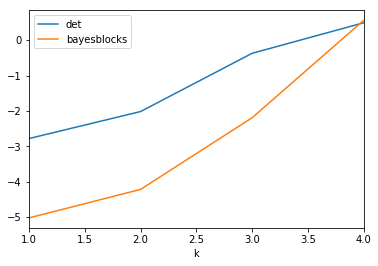

In [46]:
ax = mets.metrics('det').rename({'time': 'det'}, axis=1).plot(x='k', y='det')
ax = mets.metrics('bayesblocks').rename({'time': 'bayesblocks'}, axis=1).plot(x='k', y='bayesblocks', ax=ax)